**Atualizando a biblioteca para plotagem de gráficos**


In [30]:
!pip -q install plotly --upgrade
!pip install pandas
!pip install seaborn
!pip install -U scikit-learn

**Importando bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [2]:
base = pd.read_csv('train.csv', sep=',')
print(base.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [3]:
#base2 = pd.read_csv('/content/sample_data/restaurante_correto.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [4]:
base

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
base.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Contando quantidade de instâncias**


In [7]:
Classificação = base.columns[-1]
base[Classificação] = base[Classificação].astype(str)
np.unique(base[Classificação], return_counts=True)

(array(['C', 'Q', 'S', 'nan'], dtype=object), array([168,  77, 644,   2]))

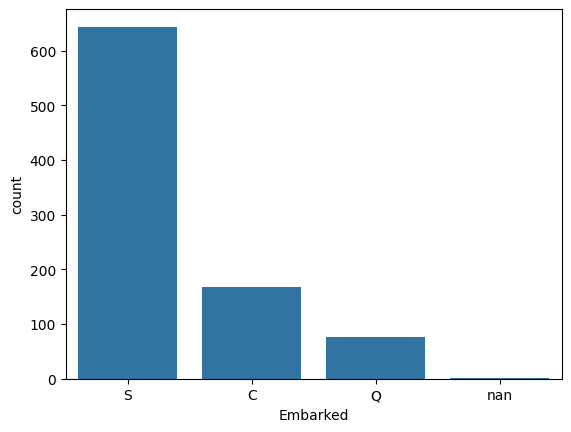

In [8]:
sns.countplot(x = base[Classificação]);

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
#para codificar todos os atributos para laberEncoder de uma única vez
#base_encoded = base.apply(LabelEncoder().fit_transform)
cols_label_encode = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',]
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

In [11]:
base

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,28,1,0,A/5 21171,18,147,S
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,51,1,0,PC 17599,207,81,C
2,3,1,2,"Heikkinen, Miss. Laina",0,34,0,0,STON/O2. 3101282,41,147,S
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,47,1,0,113803,189,55,S
4,5,0,2,"Allen, Mr. William Henry",1,47,0,0,373450,43,147,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",1,35,0,0,211536,85,147,S
887,888,1,0,"Graham, Miss. Margaret Edith",0,24,0,0,112053,153,30,S
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,88,1,2,W./C. 6607,131,147,S
889,890,1,0,"Behr, Mr. Karl Howell",1,34,0,0,111369,153,60,C




>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Contando quantas opções de resposta tem cada atributo**

In [12]:
len(np.unique(base['Survived']))

2

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
cols_onehot_encode = ['Survived']
# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)

# Aplicar o OneHotEncoder apenas nas colunas categóricas
df_onehot = onehot.fit_transform(base[cols_onehot_encode])

# Obter os novos nomes das colunas após a codificação
nomes_das_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomes_das_colunas)

# Combinar as colunas codificadas com as colunas que não foram transformadas
base_encoded= pd.concat([df_onehot, base.drop(columns=cols_onehot_encode)], axis=1)

In [15]:
base_encoded

,Survived_0,Survived_1,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,1,2,"Braund, Mr. Owen Harris",1,28,1,0,A/5 21171,18,147,S
1,0.0,1.0,2,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,51,1,0,PC 17599,207,81,C
2,0.0,1.0,3,2,"Heikkinen, Miss. Laina",0,34,0,0,STON/O2. 3101282,41,147,S
3,0.0,1.0,4,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,47,1,0,113803,189,55,S
4,1.0,0.0,5,2,"Allen, Mr. William Henry",1,47,0,0,373450,43,147,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,887,1,"Montvila, Rev. Juozas",1,35,0,0,211536,85,147,S
887,0.0,1.0,888,0,"Graham, Miss. Margaret Edith",0,24,0,0,112053,153,30,S
888,1.0,0.0,889,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,88,1,2,W./C. 6607,131,147,S
889,0.0,1.0,890,0,"Behr, Mr. Karl Howell",1,34,0,0,111369,153,60,C


In [16]:
base_encoded.shape

(891, 13)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [17]:
# Supondo que a última coluna seja o target
X_prev= base_encoded.iloc[:, :-1]
y_classe = base_encoded.iloc[:, -1]

**Método de amostragem Holdout**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_prev

,Survived_0,Survived_1,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1.0,0.0,1,2,"Braund, Mr. Owen Harris",1,28,1,0,A/5 21171,18,147
1,0.0,1.0,2,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,51,1,0,PC 17599,207,81
2,0.0,1.0,3,2,"Heikkinen, Miss. Laina",0,34,0,0,STON/O2. 3101282,41,147
3,0.0,1.0,4,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,47,1,0,113803,189,55
4,1.0,0.0,5,2,"Allen, Mr. William Henry",1,47,0,0,373450,43,147
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,887,1,"Montvila, Rev. Juozas",1,35,0,0,211536,85,147
887,0.0,1.0,888,0,"Graham, Miss. Margaret Edith",0,24,0,0,112053,153,30
888,1.0,0.0,889,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,88,1,2,W./C. 6607,131,147
889,0.0,1.0,890,0,"Behr, Mr. Karl Howell",1,34,0,0,111369,153,60


In [20]:
y_classe

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [21]:
y_classe.shape

(891,)

In [22]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [23]:
X_treino.shape

(712, 12)

In [24]:
X_teste.shape

(179, 12)

In [25]:
X_teste

,Survived_0,Survived_1,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
709,0.0,1.0,710,2,"Moubarek, Master. Halim Gonios (""William George"")",1,88,1,1,2661,101,147
439,1.0,0.0,440,1,"Kvillner, Mr. Johan Henrik Johannesson",1,41,0,0,C.A. 18723,72,147
840,1.0,0.0,841,2,"Alhomaki, Mr. Ilmari Rudolf",1,25,0,0,SOTON/O2 3101287,41,147
720,0.0,1.0,721,1,"Harper, Miss. Annie Jessie ""Nina""",0,10,0,1,248727,162,147
39,0.0,1.0,40,2,"Nicola-Yarred, Miss. Jamila",0,18,1,0,2651,75,147
...,...,...,...,...,...,...,...,...,...,...,...,...
433,1.0,0.0,434,2,"Kallio, Mr. Nikolai Erland",1,22,0,0,STON/O 2. 3101274,14,147
773,1.0,0.0,774,2,"Elias, Mr. Dibo",1,88,0,0,2674,16,147
25,0.0,1.0,26,2,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",0,51,1,5,347077,159,147
84,0.0,1.0,85,1,"Ilett, Miss. Bertha",0,22,0,0,SO/C 14885,72,147


In [26]:
y_treino

331    S
733    S
382    S
704    S
813    S
      ..
106    S
270    S
860    S
435    S
102    S
Name: Embarked, Length: 712, dtype: object

In [27]:
y_teste

709    C
439    S
840    S
720    S
39     C
      ..
433    S
773    C
25     S
84     S
10     S
Name: Embarked, Length: 179, dtype: object

In [28]:
import pickle

In [29]:
with open('train.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)